<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [5]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [6]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [7]:
#Task 1: Become familiar with the dataset
#The following describes the dataset variables:
#·      CRIM - per capita crime rate by town

#·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

#·      INDUS - proportion of non-retail business acres per town.

#·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

#·      NOX - nitric oxides concentration (parts per 10 million)

#·      RM - average number of rooms per dwelling

#·      AGE - proportion of owner-occupied units built prior to 1940

#·      DIS - weighted distances to five Boston employment centres

#·      RAD - index of accessibility to radial highways

#·      TAX - full-value property-tax rate per $10,000

#·      PTRATIO - pupil-teacher ratio by town

#·      LSTAT - % lower status of the population

#·      MEDV - Median value of owner-occupied homes in $1000's

In [8]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [10]:
#Task 2: Generate Descriptive Statistics and Visualizations
#For all visualizations, please include a title in each graph and appropriate labels

#Generate the following and explain your findings:

#For the "Median value of owner-occupied homes" provide a boxplot

#Provide a  bar plot for the Charles river variable

#Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

#Create a histogram for the pupil to teacher ratio variable

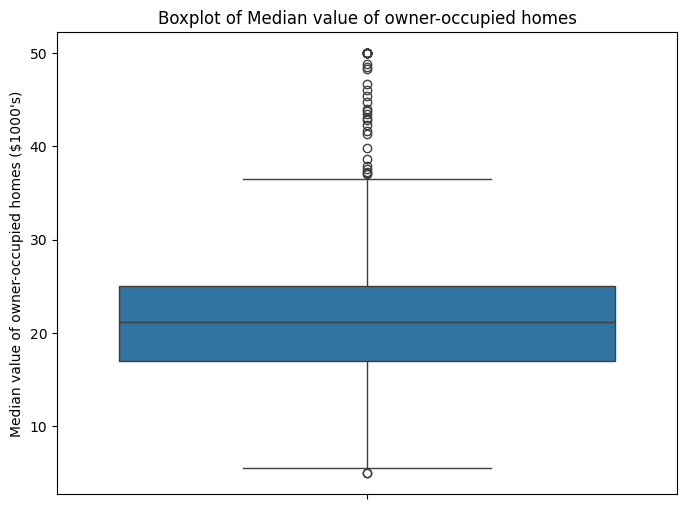

In [33]:
#Boxplot of "Median value of owner-occupied homes"
import matplotlib.pyplot as plt 

plt.figure(figsize=(8, 6)) 
x = sns.boxplot(data=boston_df, y='MEDV')

x.set_title("Boxplot of Median value of owner-occupied homes")
x.set_ylabel("Median value of owner-occupied homes ($1000's)")

plt.show()

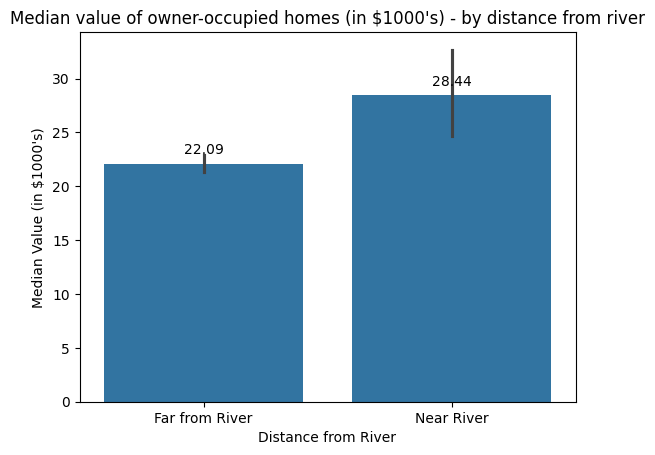

In [36]:
#Bar plot for the Charles river variable
bar_plot = sns.barplot(data=boston_df, x='CHAS', y='MEDV')

bar_plot.set_xticks([0, 1])
bar_plot.set_xticklabels(['Far from River', 'Near River'])

bar_plot.set_title("Median value of owner-occupied homes (in $1000's) - by distance from river")
bar_plot.set_xlabel("Distance from River")
bar_plot.set_ylabel("Median Value (in $1000's)")

for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 10), 
                       textcoords = 'offset points')
plt.show()



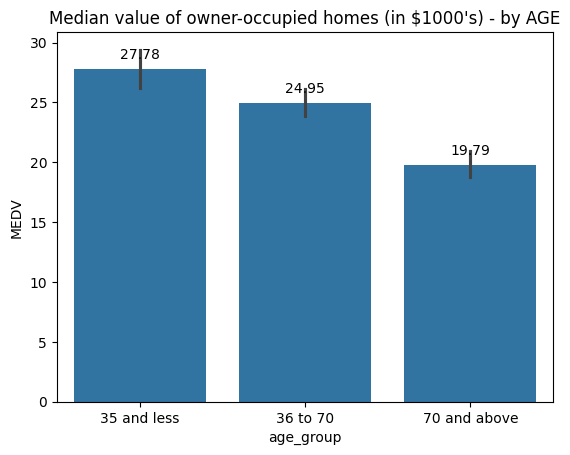

In [39]:
#Boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
#first i created the 3 required groups

boston_df['age_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')],
                                labels=['35 and less', '36 to 70', '70 and above'])

order = ['35 and less', '36 to 70', '70 and above']

bar_plot = sns.barplot(data=boston_df, x='age_group', y='MEDV', order=order)

bar_plot.set_title("Median value of owner-occupied homes (in $1000's) - by AGE")

for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10),
                      textcoords='offset points')
plt.show()


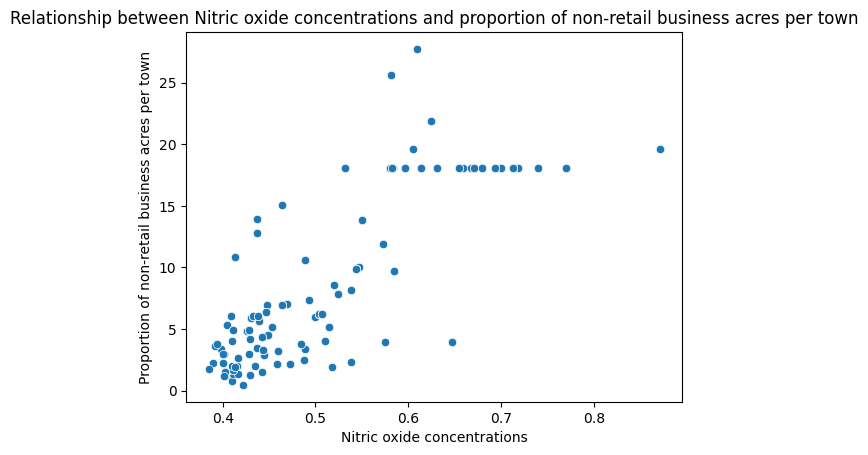

In [41]:
#Scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?


sns.scatterplot(data=boston_df, x='NOX', y='INDUS')

plt.title("Relationship between Nitric oxide concentrations and proportion of non-retail business acres per town")
plt.xlabel("Nitric oxide concentrations")
plt.ylabel("Proportion of non-retail business acres per town")

plt.show()


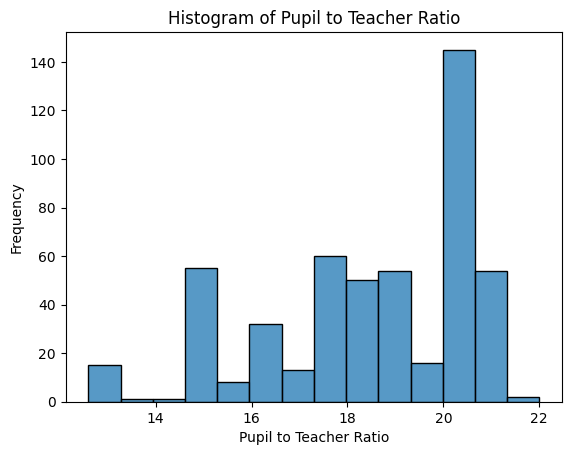

In [44]:
#Histogram for the pupil to teacher ratio variable
sns.histplot(data=boston_df, x='PTRATIO')

plt.title("Histogram of Pupil to Teacher Ratio")
plt.xlabel("Pupil to Teacher Ratio")
plt.ylabel("Frequency")

plt.show()


In [22]:
#Task 3: Use the appropriate tests to answer the questions provided.
#For each of the following questions;

#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

#What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

#Be sure to:

#State your hypothesis.

#Use α = 0.05

#Perform the test Statistics.

#State the conclusion from the test.

In [26]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
# Print statistical info on the two groups
print("Statistical info on the two groups:")
print(boston_df.groupby('CHAS')['MEDV'].describe().round(2))
print("\nCHAS=0: Houses far from the river")
print("CHAS=1: Houses near the river")

print("\nLevene test's hypothesis:")
print("Null hypothesis: The variances of houses near and far from the Charles river are equal")
print("Alternative hypothesis: The variances of the two groups are different\n")


lev_stat, lev_p = scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'], boston_df[boston_df['CHAS'] == 1]['MEDV'])
if lev_p < 0.05:
    print(f"Levene test result: p-value is {round(lev_p, 4)}, we reject the null hypothesis\n")
else:
    print(f"Levene test result: p-value is {round(lev_p, 4)}, we fail to reject the null hypothesis\n")

print("t-test hypothesis:")
print("Null hypothesis: The difference in MEDV between houses near and far from the Charles river is not significant")
print("Alternative hypothesis: There is a significant difference in MEDV between the two groups\n")

stat, p_val = scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'], boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var=False)
if p_val < 0.05:
    print(f"\nt-test result: p-value is {round(p_val, 4)}, we reject the null hypothesis")
else:
    print(f"\nt-test result: p-value is {round(p_val, 4)}, we fail to reject the null hypothesis")


Statistical info on the two groups:
      count   mean    std   min   25%   50%    75%   max
CHAS                                                    
0.0   471.0  22.09   8.83   5.0  16.6  20.9  24.80  50.0
1.0    35.0  28.44  11.82  13.4  21.1  23.3  33.15  50.0

CHAS=0: Houses far from the river
CHAS=1: Houses near the river

Levene test's hypothesis:
Null hypothesis: The variances of houses near and far from the Charles river are equal
Alternative hypothesis: The variances of the two groups are different

Levene test result: p-value is 0.0326, we reject the null hypothesis

t-test hypothesis:
Null hypothesis: The difference in MEDV between houses near and far from the Charles river is not significant
Alternative hypothesis: There is a significant difference in MEDV between the two groups


t-test result: p-value is 0.0036, we reject the null hypothesis


In [28]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
age_group_stats = boston_df.groupby('age_group')['MEDV'].describe()
print("Statistical info on the 3 AGE groups:\n", age_group_stats, "\n")

low_group = boston_df.loc[boston_df['age_group'] == '35 and less']['MEDV']
middle_group = boston_df.loc[boston_df['age_group'] == '36 to 70']['MEDV']
top_group = boston_df.loc[boston_df['age_group'] == '70 and above']['MEDV']

print("""ANOVA test hypothesis:
Null hypothesis: Samples in all AGE groups are from populations with the same mean values 
Alternative hypothesis: The means of the populations are not the same""")

f_stat, f_pval = scipy.stats.f_oneway(low_group, middle_group, top_group)

if f_pval < 0.05:
    print(f"\nANOVA test result: p-value is {f_pval}, we reject the null hypothesis")
else:
    print(f"\nANOVA test result: p-value is {f_pval}, we fail to reject the null hypothesis")


Statistical info on the 3 AGE groups:
               count       mean       std   min     25%   50%     75%   max
age_group                                                                 
35 and less    91.0  27.775824  7.638198  17.1  23.050  24.8  31.150  50.0
36 to 70      128.0  24.947656  6.969370  10.2  20.675  22.6  27.425  50.0
70 and above  287.0  19.793380  9.515375   5.0  13.800  18.2  22.550  50.0 

ANOVA test hypothesis:
Null hypothesis: Samples in all AGE groups are from populations with the same mean values 
Alternative hypothesis: The means of the populations are not the same

ANOVA test result: p-value is 1.7105011022702984e-15, we reject the null hypothesis


In [29]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
print("""Pearson correlation hypothesis:
Null hypothesis: There is no correlation between Nitric oxide concentrations and proportion of non-retail business acres per town
Alternative hypothesis: There is a correlation between Nitric oxide concentrations and proportion of non-retail business acres per town\n""")

pearson_corr, pearson_pval = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

if pearson_pval < 0.05:
    print(f"Pearson correlation result: p-value = {pearson_pval}, correlation coefficient = {round(pearson_corr, 3)}.\n"
          "We reject the null hypothesis. There is a significant correlation between the two variables.")
else:
    print(f"Pearson correlation result: p-value = {pearson_pval}, correlation coefficient = {round(pearson_corr, 3)}.\n"
          "We fail to reject the null hypothesis. There is no significant correlation between the two variables.")


Pearson correlation hypothesis:
Null hypothesis: There is no correlation between Nitric oxide concentrations and proportion of non-retail business acres per town
Alternative hypothesis: There is a correlation between Nitric oxide concentrations and proportion of non-retail business acres per town

Pearson correlation result: p-value = 7.913361061210442e-98, correlation coefficient = 0.764.
We reject the null hypothesis. There is a significant correlation between the two variables.


In [30]:
#What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
x = boston_df['DIS']  
y = boston_df['MEDV'] 

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

print(model.summary())

if model.pvalues[1] < 0.05:
    print("\nWe reject the null hypothesis. The p-value is less than 0.05, indicating a significant impact.")
else:
    print("\nWe fail to reject the null hypothesis. The p-value is greater than 0.05, indicating no significant impact.")


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           1.21e-08
Time:                        22:35:25   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0